# 6.2 Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Pair Plots
     Categorical Plots
     Bar Plots
     Creating categories for the ratings 1-10
     Renaming Countries
     Creating a Continent column
#### 4. Questions and Answers 

### 1. Importing Visualization Libraries and Data

In [4]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ipywidgets as widgets
from IPython.display import display, clear_output

import os, sys
import re

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Import Prepared Data (Path)

path = r'/Users/ladyarmanoid/Documents/__Further Trainings/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 6/Book Recommendation Analysis/'

# Import data

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'books_ratings_users.pkl'))

### 2. Data Cleaning

#### Dropping Columns:

In [7]:
df.shape

(1149780, 12)

In [8]:
df.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       '_merge'],
      dtype='object')

In [9]:
df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,_merge
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2.0,0.0,"stockton, california, usa",18,stockton,usa,both
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,both
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both


In [10]:
# Drop column '_merge' as no longer needed

df = df.drop(columns =['_merge'])

# Check output

df.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country'],
      dtype='object')

In [11]:
df.dtypes

ISBN                  object
bookTitle             object
bookAuthor            object
yearOfPublication    float64
publisher             object
User-ID              float64
Book-Rating          float64
Location              object
Age                    int32
City                  object
Country               object
dtype: object

#### Missing Values Check:

In [12]:
# Check for missing values

df.isnull().sum()

# No missing values for the main variables
# The missing values found for the 'bookTitle', 'bookAuthor', and 'publisher' have no impact
# The missing values for 'yearOfPublication' will be addressed

ISBN                      0
bookTitle            118644
bookAuthor           118644
yearOfPublication    118644
publisher            118644
User-ID                   0
Book-Rating               0
Location                  0
Age                       0
City                      0
Country                   0
dtype: int64

In [13]:
# Find duplicates

df_dups = df[df.duplicated()]

In [14]:
df_dups.shape # No duplicates!

(0, 11)

In [15]:
#### Mixed-Type Data:

In [16]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# Mixed-type columns for 'bookTitle', 'bookAuthor' and 'publisher'
# The three columns are showing NaN values

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


bookTitle
bookAuthor


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


publisher


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders

In [17]:
df['bookTitle']

0                                        Classical Mythology
1                                               Clara Callan
2                                       Decision in Normandy
3          Flu: The Story of the Great Influenza Pandemic...
4                                     The Mummies of Urumchi
                                 ...                        
1149775                                                  NaN
1149776                                                  NaN
1149777                                                  NaN
1149778                                                  NaN
1149779                                                  NaN
Name: bookTitle, Length: 1149780, dtype: object

In [18]:
df['bookAuthor']

0            Mark P. O. Morford
1          Richard Bruce Wright
2                  Carlo D'Este
3              Gina Bari Kolata
4               E. J. W. Barber
                   ...         
1149775                     NaN
1149776                     NaN
1149777                     NaN
1149778                     NaN
1149779                     NaN
Name: bookAuthor, Length: 1149780, dtype: object

In [19]:
df['publisher']

0             Oxford University Press
1               HarperFlamingo Canada
2                     HarperPerennial
3                Farrar Straus Giroux
4          W. W. Norton &amp; Company
                      ...            
1149775                           NaN
1149776                           NaN
1149777                           NaN
1149778                           NaN
1149779                           NaN
Name: publisher, Length: 1149780, dtype: object

#### Replacing NaN with 'Unknown' on Multiple Columns

In [20]:
# Using multiple columns

df2 = df[['bookTitle','bookAuthor', 'publisher' ]] = df[['bookTitle','bookAuthor', 'publisher' ]].fillna('Unknown')
print("After replacing the NaN values", df2)

After replacing the NaN values                                                  bookTitle  \
0                                      Classical Mythology   
1                                             Clara Callan   
2                                     Decision in Normandy   
3        Flu: The Story of the Great Influenza Pandemic...   
4                                   The Mummies of Urumchi   
...                                                    ...   
1149775                                            Unknown   
1149776                                            Unknown   
1149777                                            Unknown   
1149778                                            Unknown   
1149779                                            Unknown   

                   bookAuthor                   publisher  
0          Mark P. O. Morford     Oxford University Press  
1        Richard Bruce Wright       HarperFlamingo Canada  
2                Carlo D'Este             Ha

In [21]:
df2.tail()

,bookTitle,bookAuthor,publisher
1149775,Unknown,Unknown,Unknown
1149776,Unknown,Unknown,Unknown
1149777,Unknown,Unknown,Unknown
1149778,Unknown,Unknown,Unknown
1149779,Unknown,Unknown,Unknown


In [22]:
df2.columns

Index(['bookTitle', 'bookAuthor', 'publisher'], dtype='object')

In [23]:
df.tail()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country
1149775,8886661975,Unknown,Unknown,NaN,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,italy
1149776,7222025634,Unknown,Unknown,NaN,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,china
1149777,0533233661,Unknown,Unknown,NaN,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,spain
1149778,3423120754,Unknown,Unknown,NaN,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,germany
1149779,05162443314,Unknown,Unknown,NaN,Unknown,276723.0,8.0,"san antonio, texas, usa",12,san antonio,usa


In [24]:
df['bookTitle']

0                                        Classical Mythology
1                                               Clara Callan
2                                       Decision in Normandy
3          Flu: The Story of the Great Influenza Pandemic...
4                                     The Mummies of Urumchi
                                 ...                        
1149775                                              Unknown
1149776                                              Unknown
1149777                                              Unknown
1149778                                              Unknown
1149779                                              Unknown
Name: bookTitle, Length: 1149780, dtype: object

In [25]:
df['bookAuthor']

0            Mark P. O. Morford
1          Richard Bruce Wright
2                  Carlo D'Este
3              Gina Bari Kolata
4               E. J. W. Barber
                   ...         
1149775                 Unknown
1149776                 Unknown
1149777                 Unknown
1149778                 Unknown
1149779                 Unknown
Name: bookAuthor, Length: 1149780, dtype: object

In [26]:
df['publisher']

0             Oxford University Press
1               HarperFlamingo Canada
2                     HarperPerennial
3                Farrar Straus Giroux
4          W. W. Norton &amp; Company
                      ...            
1149775                       Unknown
1149776                       Unknown
1149777                       Unknown
1149778                       Unknown
1149779                       Unknown
Name: publisher, Length: 1149780, dtype: object

#### Separating the implicit and explicit ratings

As quoted in the descriptive analysis of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0

In [27]:
df['Book-Rating'].unique()

array([ 0.,  5.,  6.,  7.,  9.,  8., 10.,  3.,  1.,  4.,  2.])

In [28]:
# Creating subsets to only use the 'ratings_explicit' dataframe

ratings_explicit = df[df['Book-Rating'] != 0]
ratings_implicit = df[df['Book-Rating'] == 0]

In [29]:
# Check for missing values in 'ratings_explicit'

ratings_explicit.isnull().sum()

ISBN                     0
bookTitle                0
bookAuthor               0
yearOfPublication    49829
publisher                0
User-ID                  0
Book-Rating              0
Location                 0
Age                      0
City                     0
Country                  0
dtype: int64

In [30]:
ratings_explicit['yearOfPublication'].info # The 'yearOfPublication' variable has NaN values

<bound method Series.info of 1          2001.0
9          2002.0
12         2004.0
13         1999.0
15         1998.0
            ...  
1149775       NaN
1149776       NaN
1149777       NaN
1149778       NaN
1149779       NaN
Name: yearOfPublication, Length: 433671, dtype: float64>

In [31]:
ratings_explicit['yearOfPublication'].value_counts(dropna = False)

yearOfPublication
NaN       49829
2002.0    37986
2001.0    32331
2003.0    29166
1999.0    29100
          ...  
1806.0        1
1934.0        1
1378.0        1
1904.0        1
1376.0        1
Name: count, Length: 96, dtype: int64

In [32]:
# Create a dataframe for the missing values in 'yearOfPublication'

ratings_explicit_nan = ratings_explicit[ratings_explicit['yearOfPublication'].isnull() == True]

# Check output

ratings_explicit_nan

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country
81,01402.5448X,Unknown,Unknown,NaN,Unknown,11400.0,10.0,"ottawa, ontario, canada",49,ottawa,canada
82,0224061089,Unknown,Unknown,NaN,Unknown,11400.0,7.0,"ottawa, ontario, canada",49,ottawa,canada
83,0316666346,Unknown,Unknown,NaN,Unknown,11400.0,9.0,"ottawa, ontario, canada",49,ottawa,canada
11230,3442437407,Unknown,Unknown,NaN,Unknown,11676.0,8.0,"n/a, n/a, n/a",34,n/a,n/a
11231,8423314901,Unknown,Unknown,NaN,Unknown,11676.0,3.0,"n/a, n/a, n/a",34,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,NaN,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,italy
1149776,7222025634,Unknown,Unknown,NaN,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,china
1149777,0533233661,Unknown,Unknown,NaN,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,spain
1149778,3423120754,Unknown,Unknown,NaN,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,germany


In [33]:
# Change 'yearOfPublication' with all values as integers

ratings_explicit.yearOfPublication = pd.to_numeric(ratings_explicit.yearOfPublication, errors='coerce')

print(sorted(ratings_explicit['yearOfPublication'].unique()))

[1920.0, 1930.0, 1953.0, 1955.0, 1957.0, 1958.0, 1959.0, 1960.0, 1963.0, 1964.0, 1965.0, 1966.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1911.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1954.0, 1956.0, 1961.0, 1962.0, 1967.0, 1968.0, 1969.0, 2005.0, 2006.0]


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/1185827426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.yearOfPublication = pd.to_numeric(ratings_explicit.yearOfPublication, errors='coerce')


In [34]:
# Replacing NaNs with mean value of yearOfPublication

ratings_explicit.yearOfPublication.fillna(round(ratings_explicit.yearOfPublication.mean()), inplace = True)

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/3372698793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.yearOfPublication.fillna(round(ratings_explicit.yearOfPublication.mean()), inplace = True)


In [35]:
ratings_explicit['yearOfPublication'].info

<bound method Series.info of 1          2001.0
9          2002.0
12         2004.0
13         1999.0
15         1998.0
            ...  
1149775    1996.0
1149776    1996.0
1149777    1996.0
1149778    1996.0
1149779    1996.0
Name: yearOfPublication, Length: 433671, dtype: float64>

In [36]:
# Recheck for missing values in 'ratings_explicit'

ratings_explicit.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
User-ID              0
Book-Rating          0
Location             0
Age                  0
City                 0
Country              0
dtype: int64

### 3. Exploring Relationships

Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

#### Variables: Age, Book ratings and Year of Publication

To create a subplot, we can only use the numerical data available.

In [37]:
# Create a subset excluding the following columns
# Columns =>'ISBN', 'bookTitle', 'bookAuthor', 'publisher', 'User-ID', 'Location', 'City', 'Country'

sub = ratings_explicit[['Age', 'Book-Rating', 'yearOfPublication']]

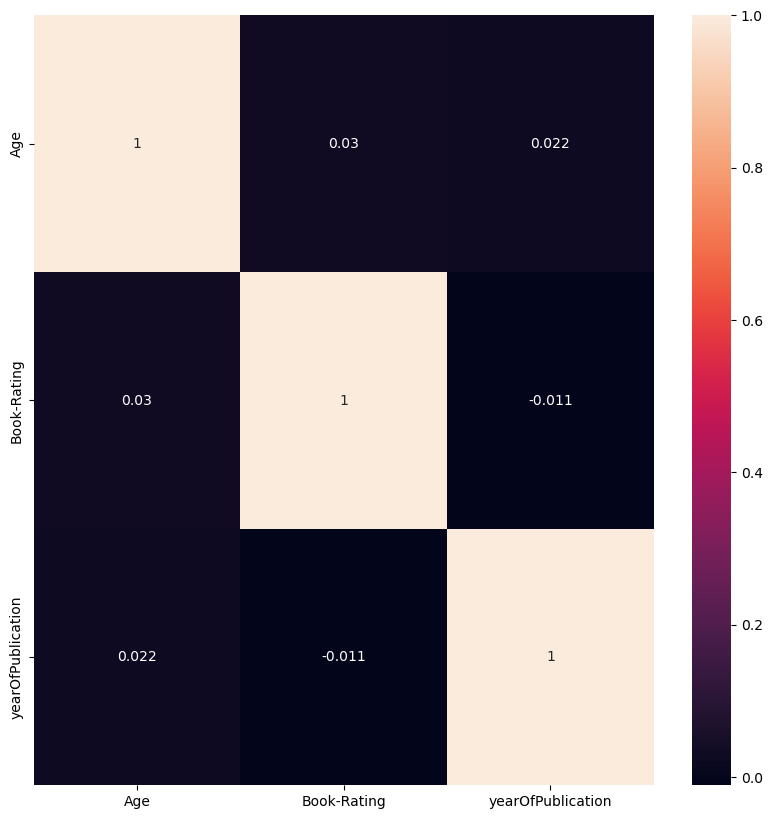

In [38]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### We have few numerical variables available in that data set. The heat map was created based on the following variables:
* Book Rating
* Year of Publication
* Age

#### What we tried to establish is if there is any type of correlation between:
* The rating and the age of the reader
* The rating and the year of publication
* The age and the year of publication

1. With "Book-Rating" & "Age": A 0.03 coefficient corrobates that ther is no correlation.

2. With "yearOfPublication" & "Book-Rating": A -0.011 coefficient indicates a negative and very low relationship.

3. With "Age" & "yearOfPublication": A 0.022 coefficient confirms also no relationship between the age of the reader and the year of publication.

### Scatterplots:

Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

In [39]:
ratings_explicit['Age'].unique()

array([34, 49, 30, 36, 29, 60, 27, 71, 40, 53, 65, 46, 47, 26, 56, 37, 39,
       25, 31, 41, 20, 58, 42, 38, 52, 21, 22, 33, 19, 57, 51, 35, 32, 62,
       45, 74, 44, 43, 68, 54, 55, 24, 18, 59, 28, 70, 17, 48, 14, 50, 16,
       61, 15, 66, 67, 23, 84, 82,  9, 72, 81, 64, 75, 69, 73, 63, 13, 77,
        7, 76, 12, 90, 79, 80, 78, 83,  8, 11, 10,  5, 85, 86,  6, 89],
      dtype=int32)

In [40]:
#### Create age groups

# Age group -> 5 to 18 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 5) & (ratings_explicit['Age'] <= 18), 'Age Group'] = '5-18 years old'

# Age group -> 19 to 35 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 19) & (ratings_explicit['Age'] <= 35), 'Age Group'] = '19-35 years old'

# Age group -> 36 to 55 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 36) & (ratings_explicit['Age'] <= 55), 'Age Group'] = '36-55 years old'

# Age group -> 56 to 74 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 56) & (ratings_explicit['Age'] <= 74), 'Age Group'] = '56-74 years old'

# Age group -> 75 to 90 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 75) & (ratings_explicit['Age'] <= 90), 'Age Group'] = '75-90 years old'

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/742962825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.loc[(ratings_explicit['Age'] >= 5) & (ratings_explicit['Age'] <= 18), 'Age Group'] = '5-18 years old'


/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


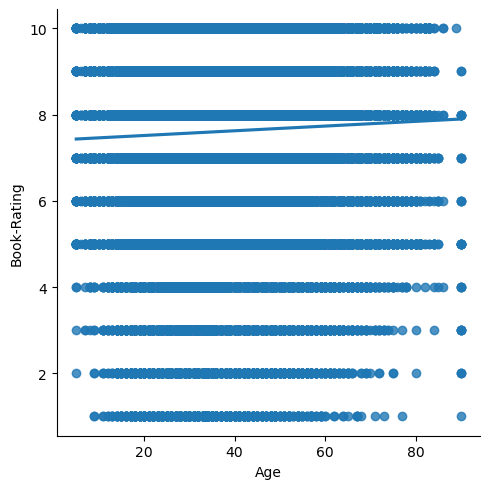

In [41]:
# Create a scatterplot for the "Age" and "Book-Rating" columns in seaborn

sns.lmplot(x = 'Age', y = 'Book-Rating', data = ratings_explicit)

The scatterplot between the 'Age' and 'Book-Rating' variables is uneventful and does not showcase any relationships.

### Pair Plots:

Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [42]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Age', 'Book-Rating', 'yearOfPublication']]

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tig

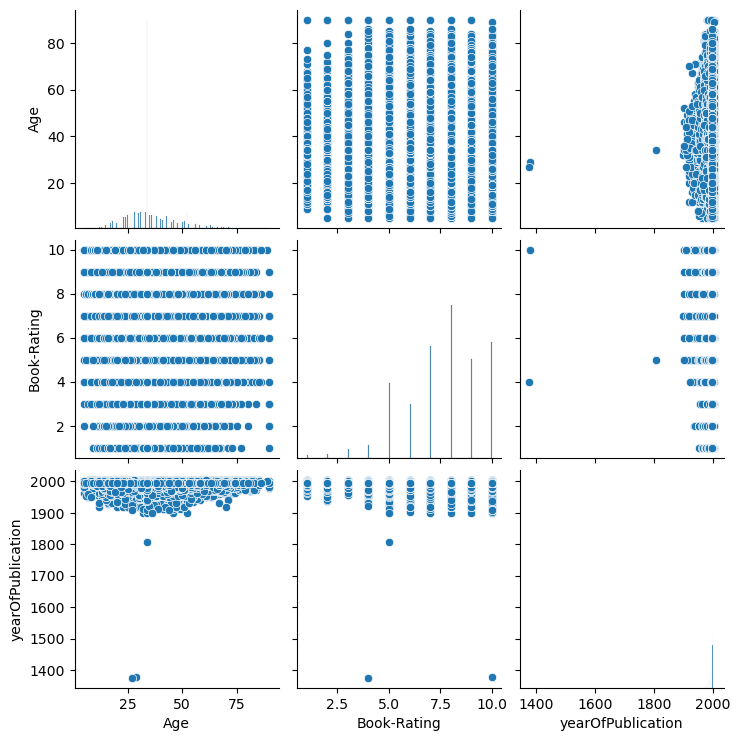

In [43]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### The pair plots are showcasing the story of the data:
* We can see that the majority of the books published happened in the 20th and 21st century,
with only a few havimng been published earlier
* The book ratings follow the same trend

### Categorical Plots:

Create a categorical plot and interpret the results.

(433671, 12)
(716109, 11)


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/1937208111.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = ratings_explicit,  x = 'Book-Rating', bins = 20, kde = True,  palette = 'rocket_r')
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


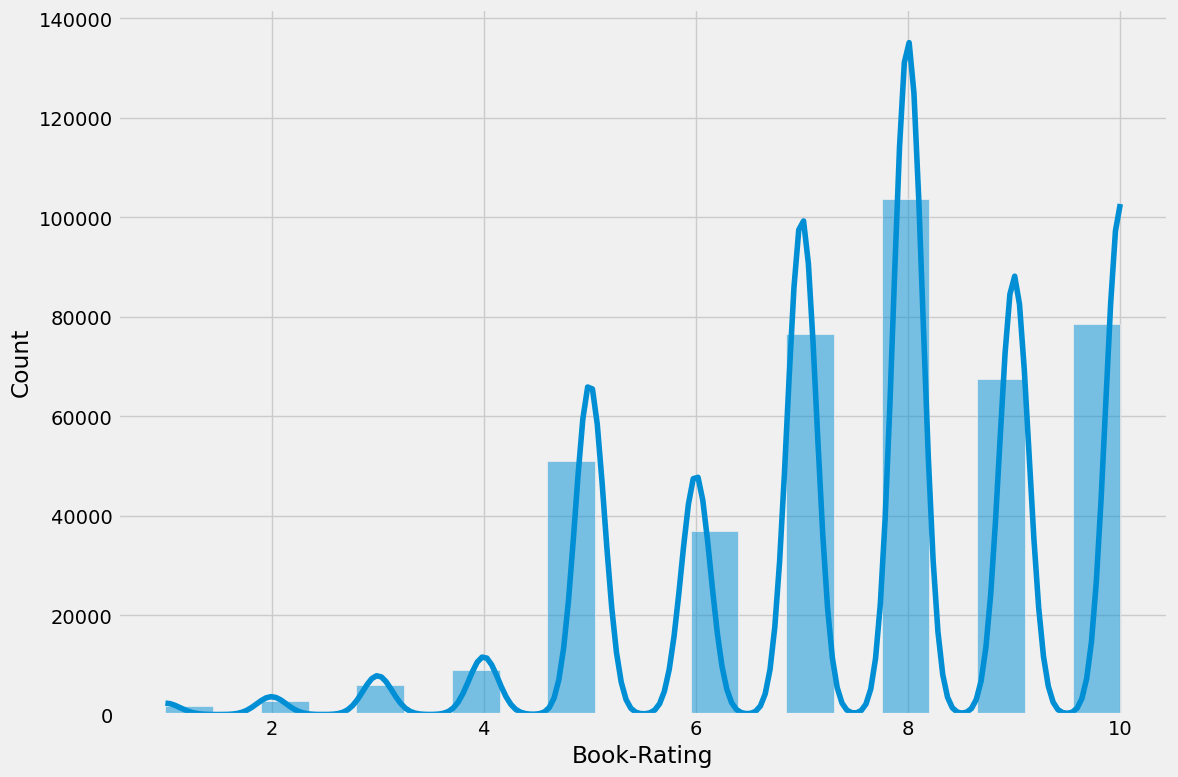

In [44]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution.

print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
sns.histplot(data = ratings_explicit,  x = 'Book-Rating', bins = 20, kde = True,  palette = 'rocket_r')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'book_ratings_er.png'))

#### The book ratings system in place vary and the most common one is the 5 stars rating system

1 STAR * => no place on a bookshelf
2 STARS ** => wasn't good but wasn't completely bad
3 STARS *** =>  neutral
4 STARS **** => enjoyed, from beginning to end
5 STARS ***** => creme de la creme of your bookshelf

#### We can categorise the 1-10 scale as following:

1 - Bad
2 - Not very good
3 - Slightly neutral
4 - Neutral
5 - Solid
6 - Notable
7 - Good
8 - Very good
9 - Superb
10 - Brilliant

### Creating categories for the ratings 1-10

For the purpose of this analysis, we are categorizing the ratings as following:

1 to 2 - Bad category
3 to 4 - Neutral category
5 to 6 - Middle category
7 to 8 - Good category
9 to 10 - Outstanding category

### Create a new 'Rating category' column

In [45]:
ratings_explicit.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       'Age Group'],
      dtype='object')

In [46]:
ratings_explicit.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old


In [47]:
#### Create Ratings Groups

# Bad Category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 1) & (ratings_explicit['Book-Rating'] <= 2), 'Rating category'] = 'Bad category'

# Neutral category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 3) & (ratings_explicit['Book-Rating'] <= 4), 'Rating category'] = 'Neutral category'

# Middle category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 5) & (ratings_explicit['Book-Rating'] <= 6), 'Rating category'] = 'Middle category'

# Good category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 7) & (ratings_explicit['Book-Rating'] <= 8), 'Rating category'] = 'Good category'

# Oustanding category

ratings_explicit.loc[ratings_explicit['Book-Rating'] >= 9, 'Rating category'] = 'Outstanding category'

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/624107651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 1) & (ratings_explicit['Book-Rating'] <= 2), 'Rating category'] = 'Bad category'


In [48]:
ratings_explicit['Rating category'].value_counts(dropna = False)

Rating category
Good category           180193
Outstanding category    146151
Middle category          87898
Neutral category         14900
Bad category              4529
Name: count, dtype: int64

In [49]:
ratings_explicit.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       'Age Group', 'Rating category'],
      dtype='object')

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


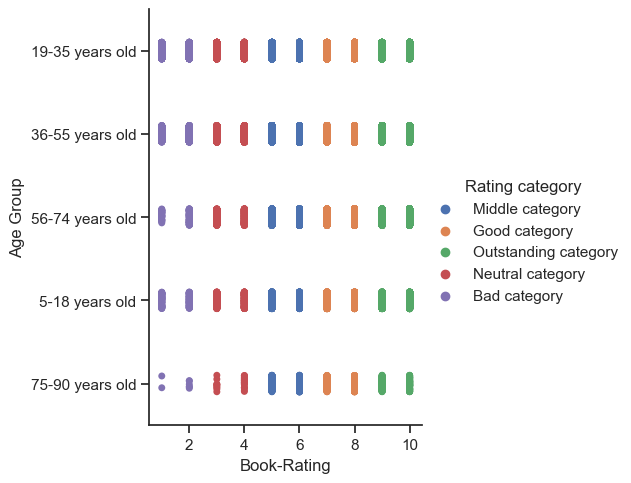

In [50]:
# Create a categorical plot in seaborn using the rating categories created above

sns.set(style = "ticks")
g = sns.catplot(x = "Book-Rating", y = "Age Group", hue = "Rating category", data = ratings_explicit)

# fig = g.get_figure()

g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'category_rating_age_group_plot.png'))

### Renaming Countries:

In [51]:
print(sorted(ratings_explicit['Country'].unique())) # We are getting 291 distinct names for the countries

['', ' &#20013;&#22269;', ' \\"n/a\\""', ' \\n/a\\""', ' afghanistan', ' alachua', ' albania', ' alderney', ' algeria', ' america', ' andorra', ' angola', ' antarctica', ' antigua and barbuda', ' argentina', ' aroostook', ' aruba', ' australia', ' austria', ' austria"', ' autralia', ' az', ' azerbaijan', ' bahamas', ' bahrain', ' bangladesh', ' barbados', ' basilicata', ' belgium', ' belize', ' benin', ' berguedà', ' bermuda', ' bolivia', ' bosnia and herzegovina', ' brasil', ' brazil', ' brazil"', ' brunei', ' bulgaria', ' burma', ' c', ' c.a.', ' calabria', ' cambodia', ' camden', ' cameroon', ' canada', ' cananda', ' cape verde', ' caribbean sea', ' catalonia', ' catalunya', ' catalunya spain', ' cayman islands', ' channel islands', ' cherokee', ' chile', ' china', ' colombia', ' costa rica', ' costa rica"', ' croatia', ' croatia"', ' csa', ' cuba', ' cyprus', ' czech republic', ' denmark', ' denmark"', ' deutschland', ' disgruntled states of america', ' dominican republic', ' ecuad

In [52]:
# Custom function to correct country names and handle specific cases
def correct_country_name(country):
    # Lowercase the country for case-insensitive matching
    country_lower = country.lower()

    # Define patterns for specific countries
    au_patterns = [' australia', ' autralia']
    ag_patterns = [' antigua and barbuda']
    at_patterns = [' austria', ' austria"']
    az_patterns = [' az', ' azerbaijan']
    ba_patterns = [' bosnia and herzegovina']
    be_patterns = [' belgium', ' la belgique']
    br_patterns = [' brasil', ' brazil', ' brazil"']
    ca_patterns = [' canada', ' cananda']
    cn_patterns = [' china', ' la chine éternelle!', ' p.r.china']
    cr_patterns = [' costa rica', ' costa rica"']
    hr_patterns = [' croatia', ' croatia"']
    eu_patterns = [' europe']
    dk_patterns = [' denmark', ' denmark"']
    fi_patterns = [' finland', ' finland"']
    fr_patterns = [' france', ' france"', ' la france']
    de_patterns = [' deutschland', ' geermany', ' germany', ' germany"']
    gw_patterns = [' guinea-bissau']
    gr_patterns = [' greece', ' greece"']
    hu_patterns = [' hungary', ' hungary"']
    in_patterns = [' india', ' india"']
    ir_patterns = [' iran', ' iran"']
    ie_patterns = [' ireland', ' ireland"']
    il_patterns = [' israel', ' israel"']
    it_patterns = [' basilicata', ' calabria', ' ferrara', ' italia', ' italy', ' italy"', ' l`italia', ' lazio', ' lombardia']
    lu_patterns = [' luxembourg', ' luxembourg"']
    mm_patterns = [' burma']
    mx_patterns = [' mexico', ' mexico"']
    nl_patterns = [' nederlands', ' netherlands', ' netherlands"', ' the netherlands']
    nz_patterns = [' new zealand', ' new zealand"', ' nz']
    no_patterns = [' norway', ' norway"']
    pa_patterns = [' panama', ' republic of panama']
    ph_patterns = [' philippines', ' philippines"', ' phillipines']
    pt_patterns = [' portugal', ' portugal"']
    sh_patterns = [' st. helena']
    si_patterns = [' slovenia', ' slovenia"']
    es_patterns = [' berguedà', ' catalonia', ' catalunya', ' catalunya spain', ' espanha / galiza', ' espaã±a', ' españa', ' españa"', ' euskal herria', ' galiza', ' lleida', ' orense', ' spain', ' spain"']
    lk_patterns = [' sri lanka', ' sri lanka"']
    se_patterns = [' sweden', ' sweden"']
    ch_patterns = [' la suisse', ' switzerland', ' switzerland"']
    tr_patterns = [' turkey', ' turkey"']
    tt_patterns = [' tobago', ' trinidad and tobago']
    ua_patterns = [' ua', ' ukraine']
    ae_patterns = [' u.a.e', ' united arab emirates']
    uk_patterns = [' united kindgonm', ' alderney', ' camden', ' england', ' scotland', ' u.k.', ' united kingdom', ' united kingdom"', ' wales']
    us_patterns = [' alachua', ' america', ' aroostook', ' c.a.', ' cherokee', ' disgruntled states of america', ' fort bend', ' framingham', ' los estados unidos de norte america', ' maracopa', ' maricopa', ' ohio', ' orange co', ' richmond country', ' rutherford', ' saint loius', ' st.thomasi', ' u.s. of a.', ' u.s.a.', ' u.s.a>', ' u.s>', ' united sates', ' united staes', ' united state', ' united states', ' united states of america', ' us', ' usa', ' usa & canada', ' usa (currently living in england)', ' worcester', ' ysa']
    uv_patterns = [' u.s. virgin islands']
    uy_patterns = [' urugua', ' uruguay']
    yu_patterns = [' yugoslavia']

    # Define patterns for unknown countries
    unknown_patterns = [' &#20013;&#22269;', '', ' \\"n/a\\""', ' \\n/a\\""', ' c', ' caribbean sea', ' csa', ' everywhere and anywhere', ' far away...', ' here and there', ' k1c7b1', ' kern', ' lkjlj', ' morgan', ' n/a', ' n/a - on the road', ' pender', ' petrolwar nation', ' polk', ' quit', ' shelby', ' space', ' tdzimi', ' the world tomorrow', ' universe', ' van wert', ' x', '"', ' europe']
    
    # Dictionary of patterns
    patterns = {
        "Australia": au_patterns, "Antigua and Barbuda": ag_patterns, "Austria": at_patterns, "Azerbaijan": az_patterns, "Belgium": be_patterns,
        "Bosnia and Herzegovina": ba_patterns, "Brazil": br_patterns, "Canada": ca_patterns, "China": cn_patterns, "Costa Rica": cr_patterns,
        "Croatia": hr_patterns, "Denmark": dk_patterns, "Finland": fi_patterns, "France": fr_patterns,
        "Germany": de_patterns, "Guinea Bissau": gw_patterns, "Greece": gr_patterns, "Hungary": hu_patterns, "India": in_patterns,
        "Iran": ir_patterns, "Ireland": ie_patterns, "Israel": il_patterns, "Italy": it_patterns,
        "Luxembourg": lu_patterns, "Myanmar": mm_patterns, "Mexico": mx_patterns, "Netherlands": nl_patterns, "New Zealand": nz_patterns,
        "Norway": no_patterns, "Panama": pa_patterns, "Philippines": ph_patterns, "Portugal": pt_patterns,
        "Saint Helena": sh_patterns, "Slovenia": si_patterns, "Spain": es_patterns, "Sri Lanka": lk_patterns,
        "Sweden": se_patterns, "Switzerland": ch_patterns, "Turkey": tr_patterns, "Trinidad and Tobago": tt_patterns, "Ukraine": ua_patterns,
        "United Arab Emirates": ae_patterns, "United Kingdom": uk_patterns, "United States": us_patterns,
        "U.S. Virgin Islands": uv_patterns, "Uruguay": uy_patterns, "Serbia": yu_patterns, "Unknown": unknown_patterns
    }

    # Check if country matches any known pattern
    for country_name, pattern_list in patterns.items():
        if country_lower in pattern_list:
            return country_name

    # If the country does not match any known pattern, return it in title case
    return country.title()

# Apply the custom function to the 'Country' column
ratings_explicit['Country'] = ratings_explicit['Country'].apply(correct_country_name)

# Display the modified DataFrame
ratings_explicit

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/126364596.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Country'] = ratings_explicit['Country'].apply(correct_country_name)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,1996.0,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,Italy,19-35 years old,Outstanding category
1149776,7222025634,Unknown,Unknown,1996.0,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,China,19-35 years old,Outstanding category
1149777,0533233661,Unknown,Unknown,1996.0,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,Spain,19-35 years old,Middle category
1149778,3423120754,Unknown,Unknown,1996.0,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,Germany,19-35 years old,Good category


In [53]:
# Check updated unique 'Country' values

print(sorted(ratings_explicit['Country'].unique()))

[' Afghanistan', ' Albania', ' Algeria', ' Andorra', ' Angola', ' Antarctica', ' Argentina', ' Aruba', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belize', ' Benin', ' Bermuda', ' Bolivia', ' Brunei', ' Bulgaria', ' Cambodia', ' Cameroon', ' Cape Verde', ' Cayman Islands', ' Channel Islands', ' Chile', ' Colombia', ' Cuba', ' Cyprus', ' Czech Republic', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Estonia', ' Fiji', ' Gabon', ' Ghana', ' Grenada', ' Guam', ' Guatemala', ' Guernsey', ' Guinea', ' Honduras', ' Hong Kong', ' Iceland', ' Indonesia', ' Jamaica', ' Japan', ' Jersey', ' Jordan', ' Kazakhstan', ' Kenya', ' Kosovo', ' Kuwait', ' Laos', ' Latvia', ' Lebanon', ' Libya', ' Lithuania', ' Macau', ' Macedonia', ' Madagascar', ' Malaysia', ' Malta', ' Mauritius', ' Moldova', ' Monaco', ' Mongolia', ' Morocco', ' Mozambique', ' Nepal', ' Netherlands Antilles', ' Nicaragua', ' Niger', ' Nigeria', ' Oman', ' Pakistan', ' Palau', ' Papua New Guinea', ' Paraguay

In [54]:
# Remove whitespaces

ratings_explicit['Country'] = ratings_explicit['Country'].str.lstrip()

# Check the output

print(sorted(ratings_explicit['Country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea Bissau', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Laos', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macau', 'Macedonia', 'Madagascar', '

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/370543721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Country'] = ratings_explicit['Country'].str.lstrip()


### Creating a 'Continent' column:

In [55]:
ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Antarctica']),
    'Continent'
] = 'Antarctica'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Algeria', 'Angola', 'Benin', 'Cameroon', 'Cape Verde', \
                                      'Egypt', 'Gabon', 'Ghana', 'Guinea', 'Guinea Bissau', \
                                      'Kenya', 'Libya', 'Madagascar', 'Mauritius', 'Morocco', 'Mozambique', \
                                      'Niger', 'Nigeria', 'Saint Helena', 'South Africa', \
                                      'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']),
    'Continent'
] = 'Africa'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Afghanistan', 'Bahrain', 'Bangladesh', 'Brunei', 'Myanmar', 'Cambodia', \
                                      'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Israel', 'Japan', \
                                      'Jordan', 'Kuwait', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Mongolia', \
                                      'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', \
                                      'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', \
                                      'Tajikistan', 'Thailand', 'Turkmenistan', 'United Arab Emirates', \
                                      'Uzbekistan', 'Vietnam', 'Yemen']),
    'Continent'
] = 'Asia'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Albania', 'Andorra', 'Austria', 'Azerbaijan', 'Belgium', 'Bosnia and Herzegovina', \
                                      'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', \
                                      'Finland', 'France', 'Germany', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Italy', \
                                      'Jersey', 'Kazakhstan', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', \
                                      'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', \
                                      'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']),
    'Continent'
] = 'Europe'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Canada', 'Cayman Islands', \
                                      'Cuba', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Grenada', 'Honduras', 'Jamaica', \
                                      'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Lucia', \
                                      'Trinidad and Tobago', 'U.S. Virgin Islands', 'United States']),
    'Continent'
] = 'North America'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Australia', 'Fiji', 'Guam', 'New Zealand','Palau', 'Papua New Guinea', \
                                      'Samoa', 'Tonga']),
    'Continent'
] = 'Oceania'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', \
                                      'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']),
    'Continent'
] = 'South America'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Unknown']),
    'Continent'
] = 'Unknown'

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_21300/1142705210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.loc[


In [56]:
# Checking the new 'Continent' column

ratings_explicit['Continent'].value_counts(dropna = False)

Continent
North America    310585
Europe            81643
Unknown           20816
Oceania           12480
Asia               6594
South America      1224
Africa              277
Antarctica           52
Name: count, dtype: int64

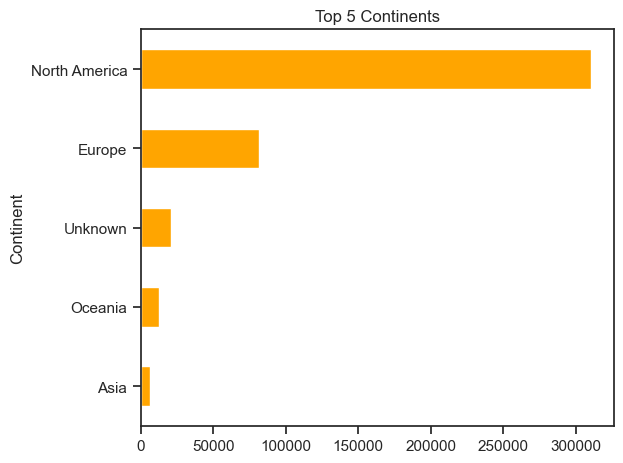

In [57]:
# Create a barchart for the continents from top to bottom

top_continent_barchart = ratings_explicit['Continent'].value_counts()[:5].sort_values(ascending = True).plot.barh(title = 'Top 5 Continents', ylabel='Continent', xlabel='', color ='orange')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/top_continent_barchart.png'))

# Show the graph

plt.show()

### 4. Questions and Answers

### *1. What geographical countries show the highest and lowest ratings?*

In [58]:
# Top 10 countries with higher ratings

country_count = pd.DataFrame(ratings_explicit.groupby(['Country'])['Book-Rating'].max())
top10countries_highratings = country_count.sort_values('Book-Rating', ascending = False).head(10)

In [59]:
top10countries_highratings

,Book-Rating
Country,
Thailand,10.0
Singapore,10.0
Slovenia,10.0
South Africa,10.0
South Korea,10.0
Japan,10.0
Spain,10.0
Italy,10.0
Israel,10.0


In [60]:
# Top 10 countries with average ratings

country1_count = pd.DataFrame(ratings_explicit.groupby(['Country'])['Book-Rating'].mean())
top10countries_avgratings = country1_count.sort_values('Book-Rating', ascending = False).head(10)

In [61]:
top10countries_avgratings

,Book-Rating
Country,
Bosnia and Herzegovina,10.000000
Mongolia,10.000000
Bangladesh,9.500000
Romania,9.048193
U.S. Virgin Islands,9.000000
Mauritius,9.000000
Kosovo,9.000000
Yemen,9.000000
Antigua and Barbuda,9.000000


In [62]:
# Group by 'Continent' and 'Age Group'

continent_age_group = ratings_explicit.groupby(['Continent', 'Age Group']).size().unstack()

continent_age_group = continent_age_group.loc[continent_age_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

continent_age_group

Age Group,19-35 years old,36-55 years old,5-18 years old,56-74 years old,75-90 years old
Continent,,,,,
Antarctica,52.0,NaN,NaN,NaN,NaN
Africa,154.0,68.0,43.0,12.0,NaN
South America,683.0,384.0,84.0,72.0,1.0
Asia,4677.0,931.0,958.0,27.0,1.0
Oceania,8702.0,2404.0,570.0,777.0,27.0
Unknown,17734.0,2102.0,180.0,706.0,94.0
Europe,56154.0,19050.0,2600.0,3819.0,20.0
North America,189066.0,93953.0,10854.0,15941.0,771.0


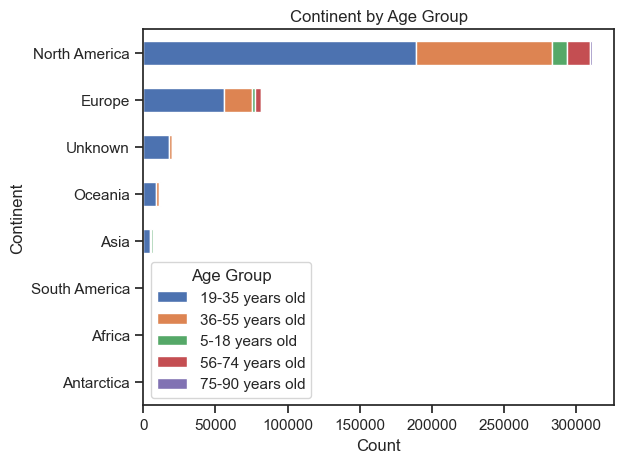

In [63]:
# Create bar chart for 'continent_age_group'

continent_age_group_bar = continent_age_group.plot.barh(stacked = True)

# Title and labels

plt.title('Continent by Age Group')
plt.xlabel('Count')
plt.ylabel('Continent')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/continent_age_group_bar.png'))

# Show the graph

plt.show()

In [64]:
# Group 'Age Group' with High 'Book Rating' into a dataframe

top10countries_highratings = ratings_explicit[['Country', 'Book-Rating']].sort_values('Book-Rating', ascending = False).head(10)

# Check Output

top10countries_highratings.head(10)

,Country,Book-Rating
973377,Austria,10.0
706754,United States,10.0
706778,United States,10.0
337364,United States,10.0
706776,United States,10.0
337354,United Kingdom,10.0
844916,United States,10.0
337350,Canada,10.0
844917,United States,10.0
337348,Canada,10.0


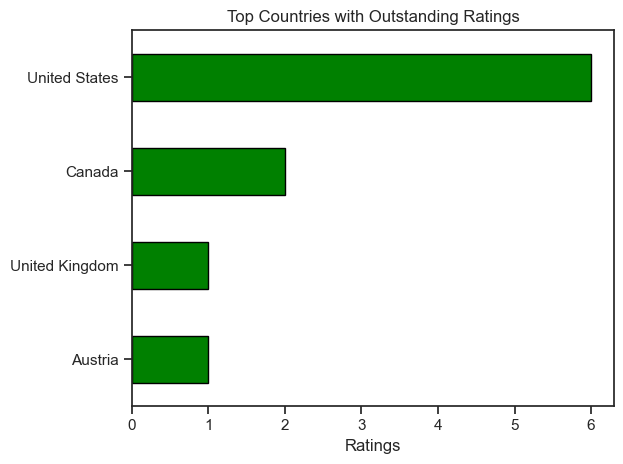

In [65]:
# Creating a bar graph for countries with high ratings

countries_highratings = top10countries_highratings['Country'].value_counts(ascending = True).plot.barh(color = 'green', edgecolor = 'black')

# Title and labels

plt.title('Top Countries with Outstanding Ratings')
plt.xlabel('Ratings')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_highratings.png'))

# Show the graph

plt.show()

In [66]:
# Group 'Age Group' with Average 'Book Rating' into a dataframe

top10countries_avgratings = country1_count.sort_values('Book-Rating', ascending = False).head(10)

# Check Output

top10countries_avgratings.head(10)

,Book-Rating
Country,
Bosnia and Herzegovina,10.000000
Mongolia,10.000000
Bangladesh,9.500000
Romania,9.048193
U.S. Virgin Islands,9.000000
Mauritius,9.000000
Kosovo,9.000000
Yemen,9.000000
Antigua and Barbuda,9.000000


In [ ]:
# Creating a bar graph for countries with average ratings

countries_avgratings = top10countries_avgratings.plot.bar(color = 'orange', edgecolor = 'black')

# Title and labels

plt.title('Countries with Average Ratings')
plt.xlabel('Country')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

In [ ]:
# Creating a bar graph for countries with average ratings

countries_avgratings = top10countries_avgratings.plot.barh(color = 'pink', edgecolor = 'black')

# Title and labels

plt.title('Countries with Average Ratings')
plt.xlabel('Ratings')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

In [ ]:
# Bottom 10 countries with lower ratings

country2_count = pd.DataFrame(ratings_explicit.groupby(['Country'])['Book-Rating'].min())
bottom10countries_lowratings = country2_count.sort_values('Book-Rating', ascending = True).head(10)

In [ ]:
bottom10countries_lowratings

In [ ]:
# Group 'Age Group' with High 'Book Rating' into a dataframe

bottom10countries_lowratings = bottom10countries_lowratings.sort_values('Book-Rating', ascending = False).head(10)

# Check Output

bottom10countries_lowratings.head(10)

In [ ]:
# Creating a bar graph for countries with bottom ratings

countries_lowratings = bottom10countries_lowratings.plot.bar(color = 'grey', edgecolor = 'black')

# Title and labels

plt.title('Countries with Low Ratings')
plt.xlabel('Country')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

In [ ]:
# Creating a bar graph for countries with bottom ratings

countries_lowratings = bottom10countries_lowratings.plot.barh(color = '#466964', edgecolor = 'black')

# Title and labels

plt.title('Countries with Low Ratings')
plt.xlabel('Ratings')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

In [ ]:
# Create a barchart for top 10 countries

top_countries_barchart = ratings_explicit['Country'].value_counts()[:10].sort_values(ascending = True).plot.barh(title = 'Top 10 Countries', ylabel='Country', xlabel='', color ='purple')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/top_countries_barchart.png'))

# Show the graph

plt.show()

In [ ]:
# Create a vertical barchart for top 10 countries

top_countries_vbarchart = ratings_explicit['Country'].value_counts()[:10].sort_values(ascending = False).plot.bar(title = 'Top 10 Countries', ylabel='', xlabel='')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/top_countries_vbarchart.png'))

# Show the graph

plt.show()

### *Answers for Question 1*:

- The countries with the highest ratings are the US, Canada, Austria and the UK
- The countries with the lowest ratings are mainly in Europe (i.e. with Spain and Switzerland) and Asia (i.e. with Japan and China)
- We can see above that the top 10 countries where the users are based are the US, Canada, the UK, Unknown countries, Germany, Spain, Australia, France, Italy and Portugal
- With the bar chart 'Continent by Age Group', we can also clearly see which part of the world represent the users 

### 2. Are there any notable patterns in reading levels based on location?

### *Answers for Question 2*:

- Solely based on the sum of book ratings per country, we can list the US, Canada and the UK as our top 3
- On a continent level, North America dominates followed by Europe, with the highest age group being between 19 and 35 years old

### 3. Which books are most popular books among users in the dataset?

In [ ]:
# Top 10 book titles and ratings

titles_count = pd.DataFrame(ratings_explicit.groupby(['bookTitle'])['Book-Rating'].sum())
top10titles = titles_count.sort_values('Book-Rating', ascending = False).head(11)

In [ ]:
top10titles # The novel 'The Lovely Bones' is the winner, achieving the highest amount or ratings throughout time

In [ ]:
# Create a barchart for top 10 most popular book titles for users

popular_titles_barchart = ratings_explicit['bookTitle'].value_counts()[1:11].sort_values(ascending = True).plot.barh(title = 'Top 10 Most Popular Book Titles', ylabel='Book Titles', xlabel='')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/popular_titles_barchart.png'))

# Show the graph

plt.show()

In [ ]:
# Top average 10 book titles and ratings

titles_avg = pd.DataFrame(ratings_explicit.groupby(['bookTitle'])['Book-Rating'].mean())
avg10titles = titles_avg.sort_values('Book-Rating', ascending = False).head(10)

In [ ]:
avg10titles  # The guide 'Passport's Guide to the Best of Scotland' is in the first position for average rating titles

In [ ]:
# Lowest 10 book titles and ratings

titles_low = pd.DataFrame(ratings_explicit.groupby(['bookTitle'])['Book-Rating'].min())
avg10titles = titles_low.sort_values('Book-Rating', ascending = False).head(10)

In [ ]:
titles_low.head(10)

In [ ]:
ratings_explicit['Book-Rating'].describe()

In [ ]:
# Top 10 book authors and ratings

ratings_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor'])['Book-Rating'].sum())
top10authors = ratings_count.sort_values('Book-Rating', ascending = False).head(11)

In [ ]:
top10authors  # Top 3 authors: Stephen King, followed by Nora Roberts and Josh Grisham are the most-read books

In [ ]:
# Create a barchart for top 10 most popular book authors for users

popular_authors_barchart = ratings_explicit['bookAuthor'].value_counts()[1:11].sort_values(ascending = True).plot.barh(title = 'Top 10 Most Popular Book Authors', ylabel='Book Authors', xlabel='')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/popular_authors_barchart.png'))

# Show the graph

plt.show()

In [ ]:
# Bottom 10 book authors and ratings

ratings2_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor'])['Book-Rating'].min())
bottom10authors = ratings2_count.sort_values('Book-Rating', ascending = True).head(10)

In [ ]:
bottom10authors # Bottom 3 authors: Gary Hauptman, D. Miller and D. Moore

In [ ]:
# Top 10 book authors and ratings by country

ratings3_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor','Country'])['Book-Rating'].sum())
top10authors_countries = ratings3_count.sort_values('Book-Rating', ascending = False).head(10)

top10authors_countries

In [ ]:
# Bottom 10 book authors and ratings by country

ratings4_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor','Country'])['Book-Rating'].min())
bottom10authors_countries = ratings4_count.sort_values('Book-Rating', ascending = True).head(10)

bottom10authors_countries

### *4. Can we identify trends in the popularity of specific authors or titles over time?*

In [ ]:
# Top 50 book authors and ratings

ratings_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor'])['Book-Rating'].sum())
top25authors = ratings_count.sort_values('Book-Rating', ascending = False).head(25)

In [ ]:
top25authors  # Top 25 authors all time

In [ ]:
ratings_explicit['yearOfPublication'].describe()

In [ ]:
#### Define Year Ranges

def year_label(row):
  if row['yearOfPublication'] <= 1376:
    return '1376'
  elif (row['yearOfPublication'] >= 1377) and (row['yearOfPublication'] <= 1477):
    return '1377-1477'
  elif (row['yearOfPublication'] >= 1478) and (row['yearOfPublication'] <= 1577):
    return '1478-1577'
  elif (row['yearOfPublication'] >= 1578) and (row['yearOfPublication'] <= 1677):
    return '1578-1677'
  elif (row['yearOfPublication'] >= 1678) and (row['yearOfPublication'] <= 1777):
    return '1678-1777'
  elif (row['yearOfPublication'] >= 1778) and (row['yearOfPublication'] <= 1877):
    return '1778-1877'
  elif (row['yearOfPublication'] >= 1878) and (row['yearOfPublication'] <= 1977):
    return '1878-1977'
  elif (row['yearOfPublication'] >= 1978) and (row['yearOfPublication'] <= 1987):
    return '1978-1987'
  elif (row['yearOfPublication'] >= 1988) and (row['yearOfPublication'] <= 1997):
    return '1988-1997'
  elif (row['yearOfPublication'] >= 1998) and (row['yearOfPublication'] <= 2006):
    return '1998-2006'
  else: return 'Not available'


# Check the output

ratings_explicit['yearRange'] = ratings_explicit.apply(year_label, axis = 1)

In [ ]:
# Check the new category


ratings_explicit['yearRange'].value_counts(dropna = False)

In [ ]:
# Create 'authors_year_range'

authors_year_range = ratings_explicit.loc[ratings_explicit['bookAuthor'].isin(['yearRange'])]

# Check output

authors_year_range.shape

In [ ]:
ratings_explicit.head()

In [ ]:
ratings_explicit.tail()

In [ ]:
# Top 100 book authors with ratings and ISBN by country

ratings4_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookAuthor','Country'])['Book-Rating'].sum())
top100authors_ISBN_countries = ratings4_count.sort_values('Book-Rating', ascending = False).head(100)

top100authors_ISBN_countries

In [ ]:
# Top 50 book authors with ratings ISBN and yearRange by country

ratings5_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookAuthor','Country'])['Book-Rating'].sum())
top50authors_ISBN_yearRange = ratings5_count.sort_values('Book-Rating', ascending = False).head(50)

top50authors_ISBN_yearRange

In [ ]:
# Top 100 book authors with ratings and ISBN by continent

ratings6_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookAuthor','Continent'])['Book-Rating'].sum())
top100authors_ISBN_continent = ratings6_count.sort_values('Book-Rating', ascending = False).head(100)

top100authors_ISBN_continent

In [ ]:
# Top 50 book authors with ratings ISBN and yearRange by continent

ratings7_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookAuthor','Continent'])['Book-Rating'].sum())
top50authors_ISBN_yearRange_continent = ratings7_count.sort_values('Book-Rating', ascending = False).head(50)

top50authors_ISBN_yearRange_continent

In [ ]:
# Top 100 book titles with ratings and ISBN by country

titles_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookTitle','Country'])['Book-Rating'].sum())
top100titles_ISBN_countries = titles_count.sort_values('Book-Rating', ascending = False).head(100)

top100titles_ISBN_countries

In [ ]:
# Top 50 book titles with ratings ISBN and yearRange by country

titles2_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookTitle','Country'])['Book-Rating'].sum())
top50titles_ISBN_yearRange = titles2_count.sort_values('Book-Rating', ascending = False).head(50)

top50titles_ISBN_yearRange

In [ ]:
# Top 100 book titles with ratings and ISBN by continent

titles3_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookTitle','Continent'])['Book-Rating'].sum())
top100titles_ISBN_continent = titles3_count.sort_values('Book-Rating', ascending = False).head(100)

top100titles_ISBN_continent

In [ ]:
# Top 50 book titles with ratings ISBN and yearRange by continent

titles4_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookTitle','Continent'])['Book-Rating'].sum())
top50titles_ISBN_yearRange_continent = titles4_count.sort_values('Book-Rating', ascending = False).head(50)

top50titles_ISBN_yearRange_continent

In [ ]:
# Top 100 book titles and authors with ratings and ISBN by country

titles_authors_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','Country','bookTitle','bookAuthor'])['Book-Rating'].sum())
top100titlesAuthors_ISBN_countries = titles_authors_count.sort_values('Book-Rating', ascending = False).head(100)

top100titlesAuthors_ISBN_countries

In [ ]:
# Top 50 book titles and authors with ratings ISBN and yearRange by country

titles2_authors_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','Country','bookTitle','bookAuthor'])['Book-Rating'].sum())
top50titlesAuthors_ISBN_yearRange = titles2_authors_count.sort_values('Book-Rating', ascending = False).head(50)

top50titlesAuthors_ISBN_yearRange

In [ ]:
# Top 100 book titles and authors with ratings and ISBN by continent

titles3_authors_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','Continent','bookTitle','bookAuthor'])['Book-Rating'].sum())
top100titlesAuthors_ISBN_continent = titles3_authors_count.sort_values('Book-Rating', ascending = False).head(100)

top100titlesAuthors_ISBN_continent

In [ ]:
# Top 50 book titles and authors with ratings ISBN and yearRange by continent

titles4_authors_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','Continent','bookTitle','bookAuthor'])['Book-Rating'].sum())
top50titlesAuthors_ISBN_yearRange_continent = titles4_authors_count.sort_values('Book-Rating', ascending = False).head(50)

top50titlesAuthors_ISBN_yearRange_continent

### *Answers for Question 4*:

- We grouped the data by year range, country or continent along with the book titles and/or authors:
* The author with the highest number of readers between 1998 and 2006 is Alice Sebold with the novel "The Lovely Bones"

### *5. Are there noticeable differences in reading levels among age groups?*

In [ ]:
# Group by 'yearRange', 'Continent' and 'Age Group'

year_continent_age_group = ratings_explicit.groupby(['yearRange', 'Continent', 'Age Group']).size().unstack()

year_continent_age_group = year_continent_age_group.loc[year_continent_age_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

year_continent_age_group

In [ ]:
# Group by 'yearRange' and 'Continent'

year_continent_group = ratings_explicit.groupby(['yearRange', 'Continent']).size().unstack()

year_continent_group = year_continent_group.loc[year_continent_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

year_continent_group

In [ ]:
# Create bar chart for 'continent_year_range'

year_continent_group_bar = year_continent_group.plot.barh(stacked = True)

# Title and labels

plt.title('Continent by Periods')
plt.xlabel('Count')
plt.ylabel('Year Range')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/year_continent_group_bar.png'))

# Show the graph

plt.show()

In [ ]:
# Group by 'Age Group', 'yearRange', and 'Continent'

age_year_continent = ratings_explicit.groupby(['Age Group','yearRange', 'Continent']).size().unstack()

age_year_continent = age_year_continent.loc[age_year_continent.sum(axis = 1).sort_values(ascending = True).index]

# Check output

age_year_continent

In [ ]:
# Create bar chart for 'age_year_continent'

age_year_continent_bar = age_year_continent.plot.barh(stacked = True)

# Title and labels

plt.title('Age Group by Periods & Continent')
plt.xlabel('Count')
plt.ylabel('Year Range')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/age_year_continent_bar.png'))

# Show the graph

plt.show()

### *Answers for Question 5*:

 Are there noticeable differences in reading levels among age groups?*
    
- As mentioned earlier for the question number 2, the data analysis showcases the 19-35 years old group as
the most regular readers between 1988 and 2006, followed by the 36-55 years old group for the same period

In [ ]:
# Exporting 'df' dataframe

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df.pkl'))

In [ ]:
# Exporting 'ratings_implicit' dataframe

ratings_implicit.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ratings_implicit.pkl'))

In [ ]:
# Exporting 'ratings_explicit' dataframe

ratings_explicit.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ratings_explicit.pkl'))

In [ ]:
# Exporting 'ratings_explicit' dataframe

ratings_explicit.to_csv(os.path.join(path, '02 Data','Prepared Data', 'ratings_explicit.csv'))